

<img src="assets/eg3.jpg", alt="Photo of Midwestern Home", height="250", width="375">

# Using Supervised Machine Learning to Predict Home Prices

** Author: Jackie Zuker **

** October 2017 **



## Exploration of the Dataset

This dataset includes various features of homes sold between 2006 and 2010 within the community.

The Ames Housing dataset is comprised of **2,930 observations** (1460 included in the training dataset) across **82 variables**. There are 23 nominal variables, 23 ordinal variables, 14 discrete, and 20 continuous variables. 

**Question of interest: Can the sales price of a home be predicted?** 

Before diving into the statistical analysis, let's get oriented to our dataset. First we see a histogram of the distribution of sales prices of the homes in the dataset. 

In [56]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from scipy import stats

# Set up matplotlib to display inline in Jupyter notebook
%matplotlib inline
sns.set_context("poster")

In [2]:
# Read in the data
homePricesTrain = pd.read_csv("/Users/jacquelynzuker/Documents/DataScienceBootcamp/Capstone/train.csv")
print("Dimensions of homePricesTrain: ", homePricesTrain.shape)
homePricesTest = pd.read_csv("/Users/jacquelynzuker/Documents/DataScienceBootcamp/Capstone/test.csv")
print("Dimensions of homePricesTest: ", homePricesTest.shape)

# Set the label of Sale Price to its own variable. 
label = homePricesTrain['SalePrice']
homePricesTrain['Group'] = 'train'
homePricesTest['Group'] = 'test'

# Concatenate the test and training sets so that all feature engineering, data cleaning, etc is applied to both groups.
frames = [homePricesTrain, homePricesTest]
homePrices = pd.concat(frames)
homePricesPCA = homePrices


homePrices

Dimensions of homePricesTrain:  (1460, 81)
Dimensions of homePricesTest:  (1459, 80)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


## Distribution of Sale Prices

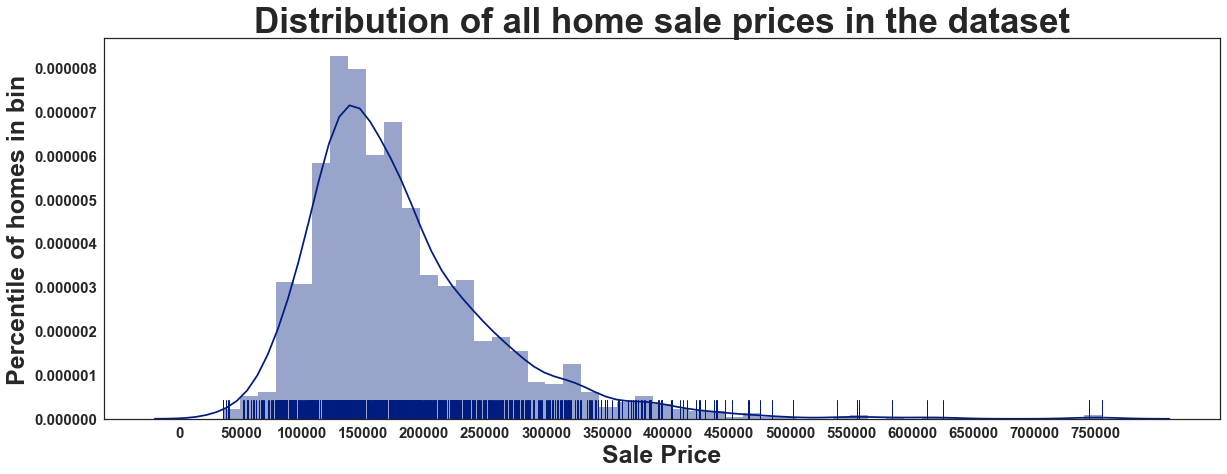

In [3]:
# Histogram of home prices
sns.set(style="white", palette="dark")
plt.figure(figsize=(20,7))
sns.distplot(homePricesTrain["SalePrice"], kde=True, rug=True);
plt.title("Distribution of all home sale prices in the dataset", size = 35, fontweight = "bold")
plt.xlabel("Sale Price", size = 25, fontweight = "bold")
plt.ylabel("Percentile of homes in bin", size = 25, fontweight = "bold")
plt.xticks(np.arange(0, max(homePricesTrain["SalePrice"])+1000, 50000), size=15, fontweight = "bold")
plt.yticks(size = 15, fontweight = "bold")
plt.show()

## Neighborhood

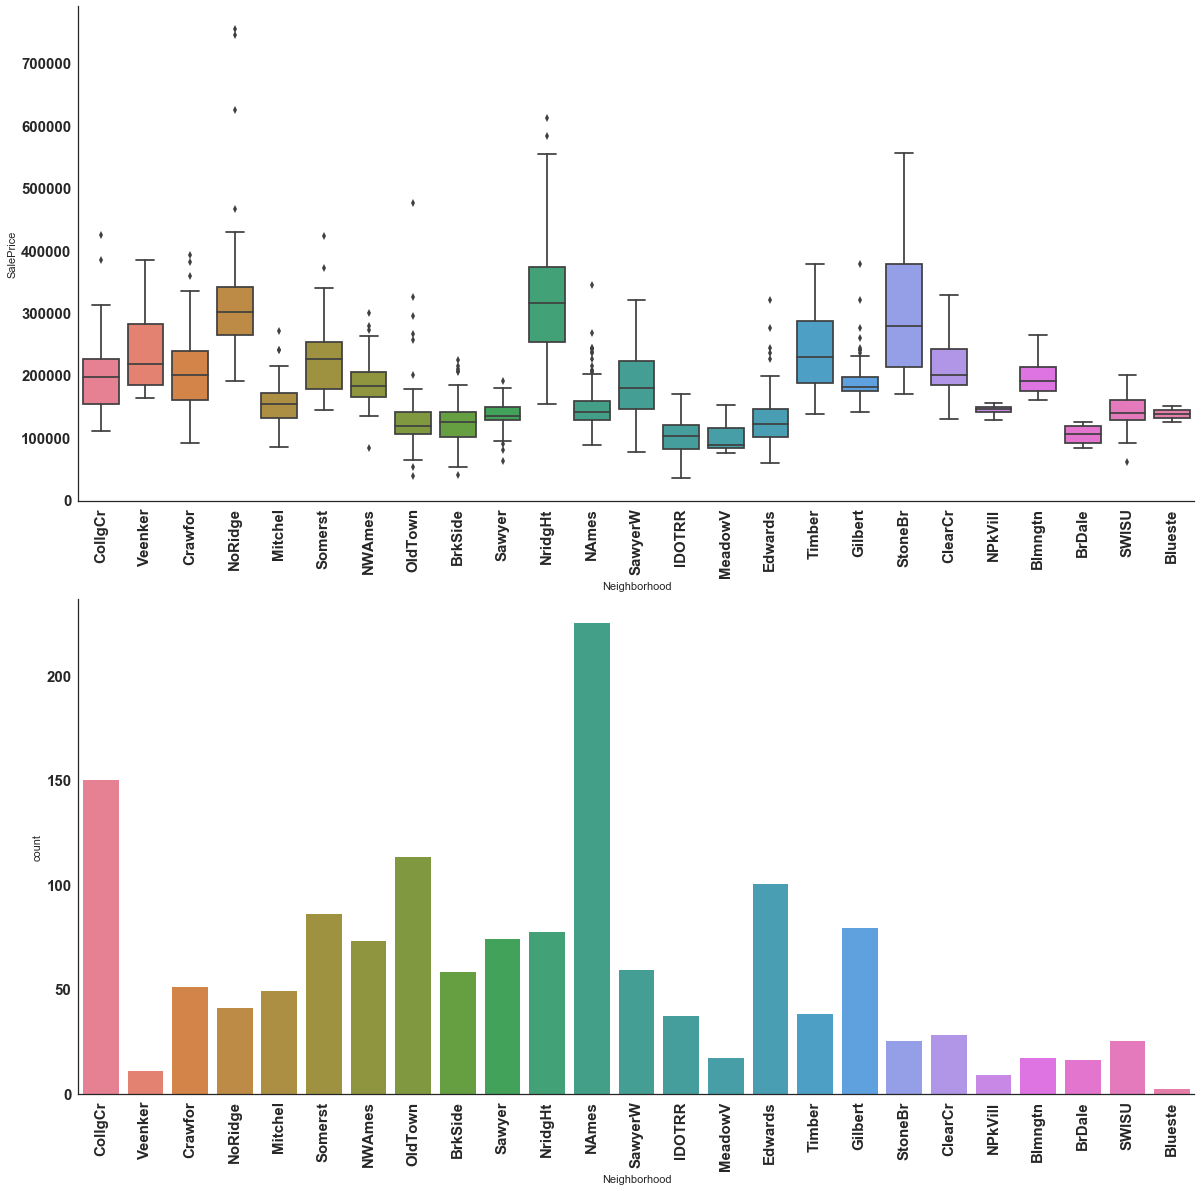

In [4]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(20,20))
sns.despine(left=False)

sns.boxplot("Neighborhood","SalePrice",data=homePricesTrain, palette="husl", ax=ax1)
sns.countplot(x="Neighborhood", data=homePricesTrain, palette="husl", ax=ax2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90, size = 15, fontweight = "bold")
    plt.yticks(size = 15, fontweight = "bold")
    
plt.show()

## Home Quality and Home Condition

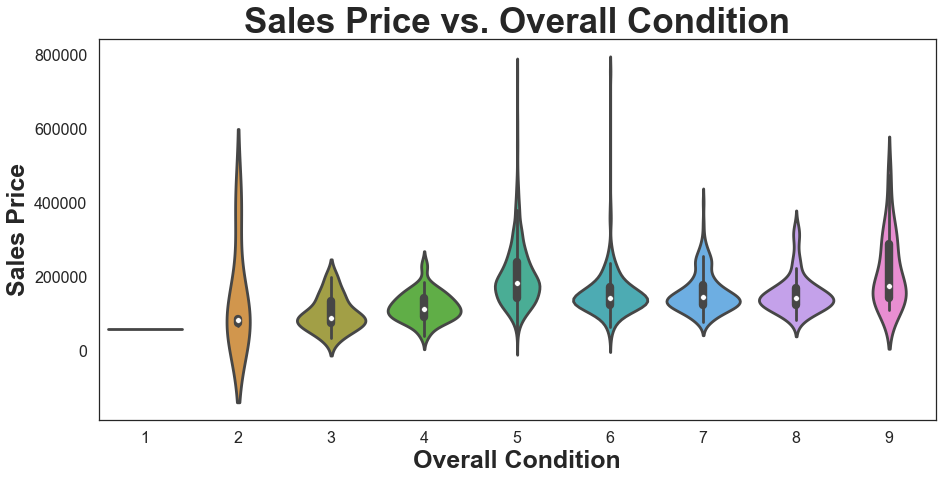

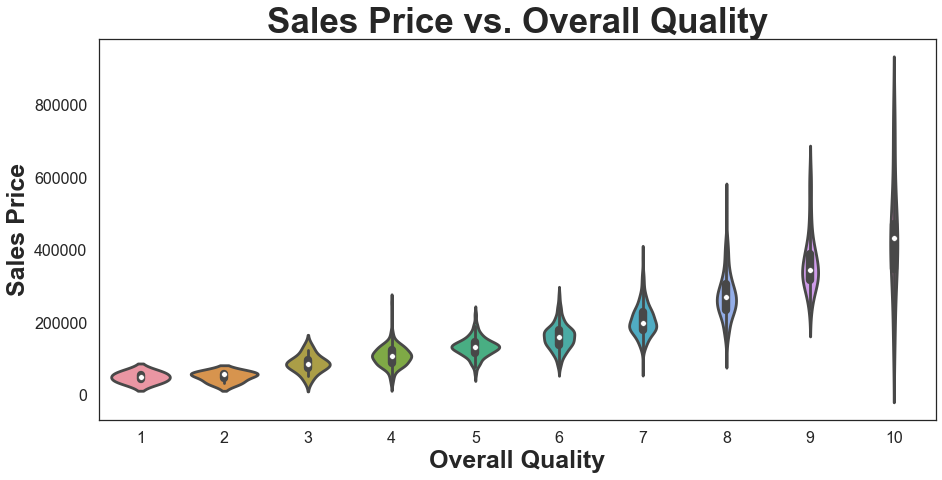

In [5]:
#fig, axs = plt.subplots(ncols = 2, figsize = (20,10))
sns.set_context("poster")

sns.despine(trim = True)
plt.figure(figsize=(15,7))
sns.violinplot("OverallCond","SalePrice",data = homePricesTrain)#, ax = axs[1])
plt.title("Sales Price vs. Overall Condition", size = 35, fontweight = "bold")
plt.xlabel("Overall Condition", size = 25, fontweight = "bold")
plt.ylabel("Sales Price", size = 25, fontweight = "bold")
#plt.show()

plt.figure(figsize=(15,7))
sns.violinplot("OverallQual","SalePrice",data = homePricesTrain)#, ax = axs[0])
plt.title("Sales Price vs. Overall Quality", size = 35, fontweight = "bold")

plt.ylabel("Sales Price", size = 25, fontweight = "bold")
plt.xlabel("Overall Quality", size = 25, fontweight = "bold")
plt.show()


#for ax in fig.axes:
#    plt.sca(ax)
#    plt.xticks(rotation=90, size = 15, fontweight = "bold")
#   plt.yticks(size = 15, fontweight = "bold")
#   plt.ylabel("Sale Price", size = 15, fontweight = "bold")


# Modelling and Prediction

## Data Cleaning

**Missing Value Imputation:**

The first step is to deal with any missing values. The following variables have more than 15% of the values missing or NaN. 

In [6]:
del homePrices["SalePrice"]

nans = pd.isnull(homePrices).sum()
missing = nans[nans>(len(homePrices)*.15)]
missing = list(missing.index)
print(missing)

['Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'MiscFeature', 'PoolQC']


* Replaced NaN's in the above categorical fields with the string, "None"
* This allows us to keep fields that sometimes have interesting information, such as second garages and large sheds in the "Misc Feature" column to be kept. 
* The numerical feature LotFrontage was dropped, because this made more sense than imputing with a mean or replacing with 0.

In [7]:
homePrices.Alley.fillna(value="None", axis = 'index', inplace=True)
homePrices.Fence.fillna(value="None", axis = 'index', inplace=True)
homePrices.FireplaceQu.fillna(value="None", axis = 'index', inplace=True)
homePrices.MiscFeature.fillna(value="None", axis = 'index', inplace=True)
homePrices.PoolQC.fillna(value="None", axis = 'index', inplace=True)

homePrices.drop("LotFrontage", axis = 1, inplace=True)

nans=pd.isnull(homePrices).sum()
missing = nans[nans>(len(homePrices)*.15)]
missing = list(missing.index)
homePrices.drop(homePrices[missing], axis = 1, inplace = True)
print(missing)

# Next let's investigate which NaN values remain, and how many there are in each category: # 
nans = pd.isnull(homePrices).sum()
nans[nans > 0] 


[]


BsmtCond         82
BsmtExposure     82
BsmtFinSF1        1
BsmtFinSF2        1
BsmtFinType1     79
BsmtFinType2     80
BsmtFullBath      2
BsmtHalfBath      2
BsmtQual         81
BsmtUnfSF         1
Electrical        1
Exterior1st       1
Exterior2nd       1
Functional        2
GarageArea        1
GarageCars        1
GarageCond      159
GarageFinish    159
GarageQual      159
GarageType      157
GarageYrBlt     159
KitchenQual       1
MSZoning          4
MasVnrArea       23
MasVnrType       24
SaleType          1
TotalBsmtSF       1
Utilities         2
dtype: int64

The Garage and Basement variables which are currently NaNs were also found to be the Garages and Basements with 0 square footage. The NaN's were replaced with the string "None" for further analysis. The GarageYearBlt is directly correlated with the Home year built, and there was no easy way to impute the NaN's, so this column was dropped. 

The remaining variables are replaced with mean values for the discrete fields, and mode values for the categorical fields.


In [8]:
homePrices.GarageCond.fillna(value="None", axis = 'index', inplace=True)
homePrices.GarageFinish.fillna(value="None", axis = 'index', inplace=True)
homePrices.GarageQual.fillna(value="None", axis = 'index', inplace=True)
homePrices.GarageType.fillna(value="None", axis = 'index', inplace=True)

homePrices['BsmtCond'].fillna(value="None", axis = 'index', inplace=True)
homePrices['BsmtExposure'].fillna(value="None", axis = 'index', inplace=True)
homePrices['BsmtFinType1'].fillna(value="None", axis = 'index', inplace=True)
homePrices['BsmtFinType2'].fillna(value="None", axis = 'index', inplace=True)
homePrices['BsmtQual'].fillna(value="None", axis = 'index', inplace=True)

homePrices = homePrices.drop("GarageYrBlt", 1)

# Replaces NAs in scalar fields with the mean value
homePrices = homePrices.fillna(homePrices.mean())

nans = pd.isnull(homePrices).sum()
stillmissing = nans[nans>0]
stillmissing = stillmissing.index

# Replaces NAs in categorical fields with the mode value
for feature in stillmissing:
    homePrices.loc[(homePrices[feature].isnull()), feature] = str(homePrices[feature].mode())
    
nans = pd.isnull(homePrices).sum()
nans[nans > 0]

Series([], dtype: int64)

** All missing values have been imputed. **



# Feature Engineering

## Feature Selection and Filtering

As previously observed, the distribution of Sale Prices is right-skewed. One basic assumption of Linear Regression is that all variables are normally distributed. Introducing a variable, log of Sale Price is likely to yield a better model. 


In [9]:
logged_label = np.log(label)

## Log of Sale Price Results in More Uniform Distribution

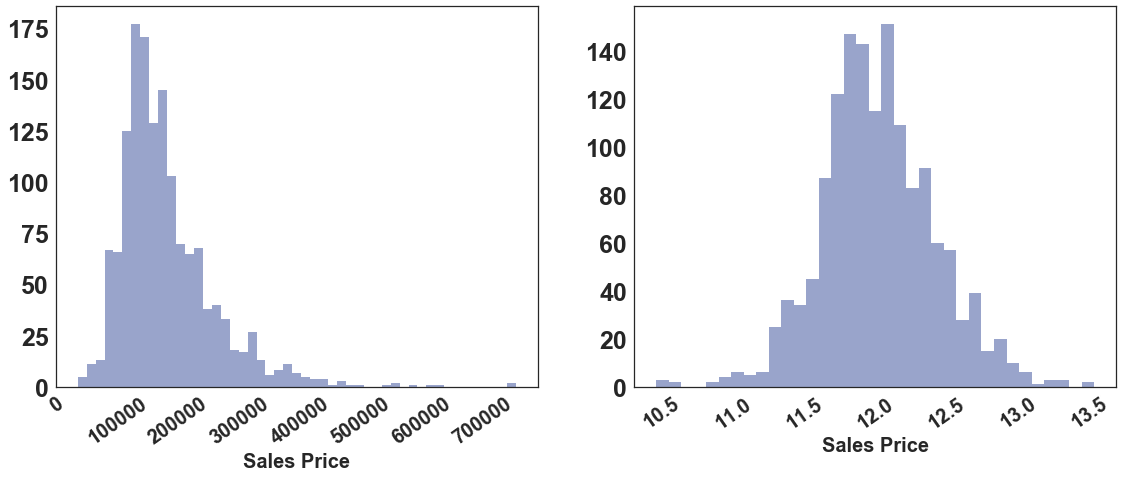

In [10]:
# Compare the distributions of Sale Price versus logged Sale Price. The logged Sale Price is more normally distributed. 
sns.set(style = "white", palette = "dark")
fig, axs = plt.subplots(ncols=2, figsize = (19,7))
plt.xticks(rotation = 45)
sns.distplot(label, kde = False, rug = False, ax = axs[0])
sns.distplot(logged_label, kde = False, rug = False,  ax = axs[1])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=35, size = 20, fontweight = "bold")
    plt.yticks(size = 25, fontweight = "bold")
    plt.xlabel("Sales Price", size = 20, fontweight = "bold")
  

plt.show()



### Create Timeline of Month/Year of Sale of Home

In [11]:
# Put dates of homes sold on a linear timeline, Jan 2006 => timeline = 1; Feb 2006 => timeline = 2
homePrices["timeline"] = ((homePrices["YrSold"]-2006)*12 + homePrices['MoSold'])
inspectTimeline = pd.DataFrame()
inspectTimeline["timeline"] = homePrices["timeline"]
inspectTimeline["SalePrice"] = np.exp(logged_label)
inspectTimeline["YrSold"] = homePrices["YrSold"]
inspectTimeline["MoSold"] = homePrices["MoSold"]
inspectTimeline['timeline_var'] = inspectTimeline["timeline"]

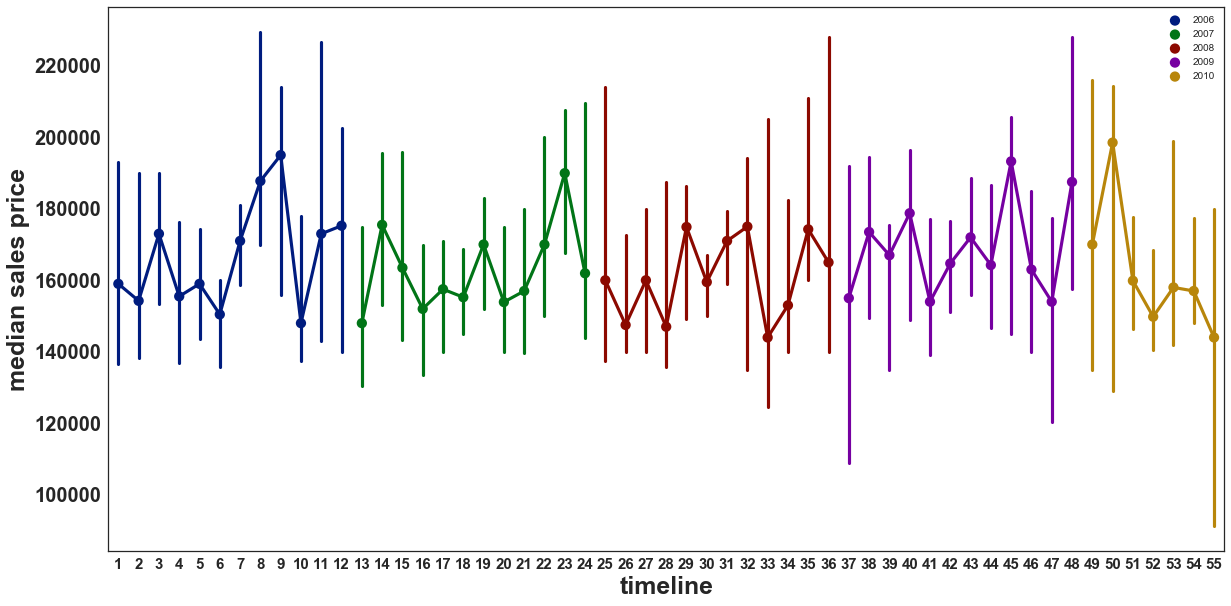

In [12]:
from numpy import median
plt.figure(figsize = (20, 10))
sns.pointplot(x = "timeline", y = "SalePrice", data = inspectTimeline, hue="YrSold", estimator = median)
plt.xlabel("timeline", size = 25, fontweight = "bold")
plt.ylabel("median sales price", size = 25, fontweight = "bold")
plt.xticks(size = 15, fontweight = "bold")
plt.yticks(size = 20, fontweight = "bold")
plt.legend()
plt.show()

## Other Engineered Variables: Total Square-Footage, Total Full Baths, Total Half Baths, and Deck Square-Footage


In [13]:
# Total square-footage of home, including basement sq-footage. 
homePrices["totalSqft"] = homePrices["GrLivArea"] + homePrices["TotalBsmtSF"]

#Total Full and Half Baths
homePrices["totalFullBath"] = homePrices["BsmtFullBath"] + homePrices["FullBath"] 
homePrices["totalHalfBath"] = homePrices["BsmtHalfBath"] + homePrices["HalfBath"]

# Deck Square-Footage
homePrices["deckPorchSqft"] = (homePrices["WoodDeckSF"] + homePrices["OpenPorchSF"] + 
                           homePrices["EnclosedPorch"] + homePrices["3SsnPorch"] + 
                           homePrices["ScreenPorch"])

homePricesCleaned = homePrices

## One-Hot Encoding

In [14]:
homePricesWithDummies = pd.get_dummies(data = homePrices)

# The MSSubClass variable has several numerical values, however each signify a different categorical class. 
# Get dummy variables for the MS SubClass variables. 
homePricesMSDummies = pd.get_dummies(data=homePrices["MSSubClass"])
frames = [homePricesWithDummies, homePricesMSDummies]
homePricesWithDummies = pd.concat(frames, axis = 1)
len(homePricesWithDummies)

2919

## Feature Filtering
We now filter based on how well the variable correlates with Sale Price. We split the training and test sets at this point, and reintroduce SalePrice to the training dataset. 

In [15]:
# Rebuild training set
training_cleaned = homePricesWithDummies[homePricesWithDummies["Group_train"]==1]
training_cleaned["loggedSalePrice"] = logged_label 

# Rebuild test set
test_cleaned = homePricesWithDummies[homePricesWithDummies["Group_test"]==1]

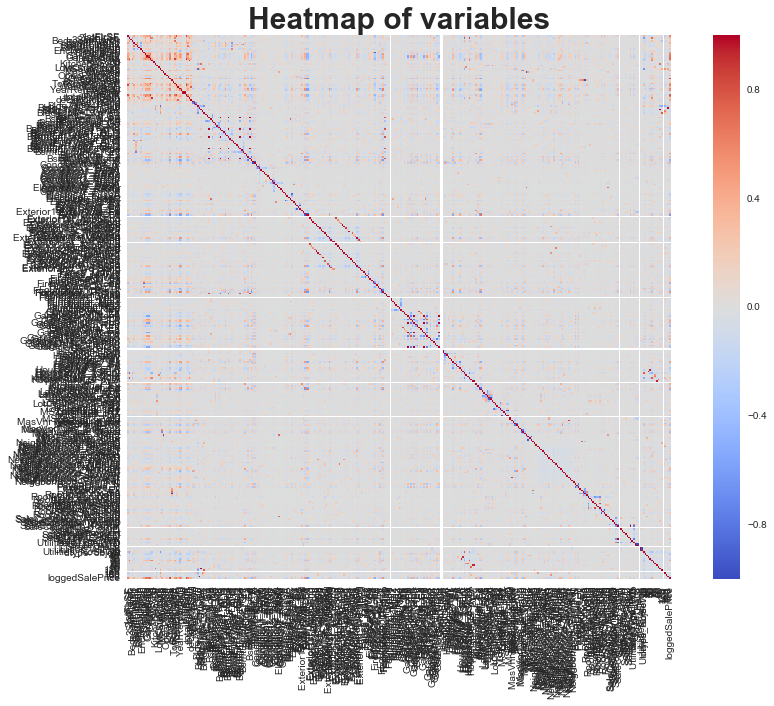

In [16]:
plt.figure(figsize = (15,10))
bigger_vars_of_interest = training_cleaned.columns

# Correlation matrix of numerical features
corrmat = training_cleaned[bigger_vars_of_interest].corr()

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax = .8, square = True, cmap = 'coolwarm')
plt.title("Heatmap of variables", size = 30, fontweight = "bold")
plt.show()

In [17]:
best_features001 = corrmat[corrmat["loggedSalePrice"] >= 0.0001]
best_features001 = list(best_features001.index)
best_features = corrmat[corrmat["loggedSalePrice"] >= 0.10]
best_features = list(best_features.index)
#best_features

In [18]:
best_neg_features001 = corrmat[corrmat["loggedSalePrice"] <= -0.0001]
best_neg_features001 = list(best_neg_features001.index)
best_neg_features = corrmat[corrmat["loggedSalePrice"] <= -0.10]
best_neg_features = list(best_neg_features.index)
#best_neg_features

In [19]:
all_best_features = best_features + best_neg_features
all_best_features001 = best_features001 + best_neg_features001

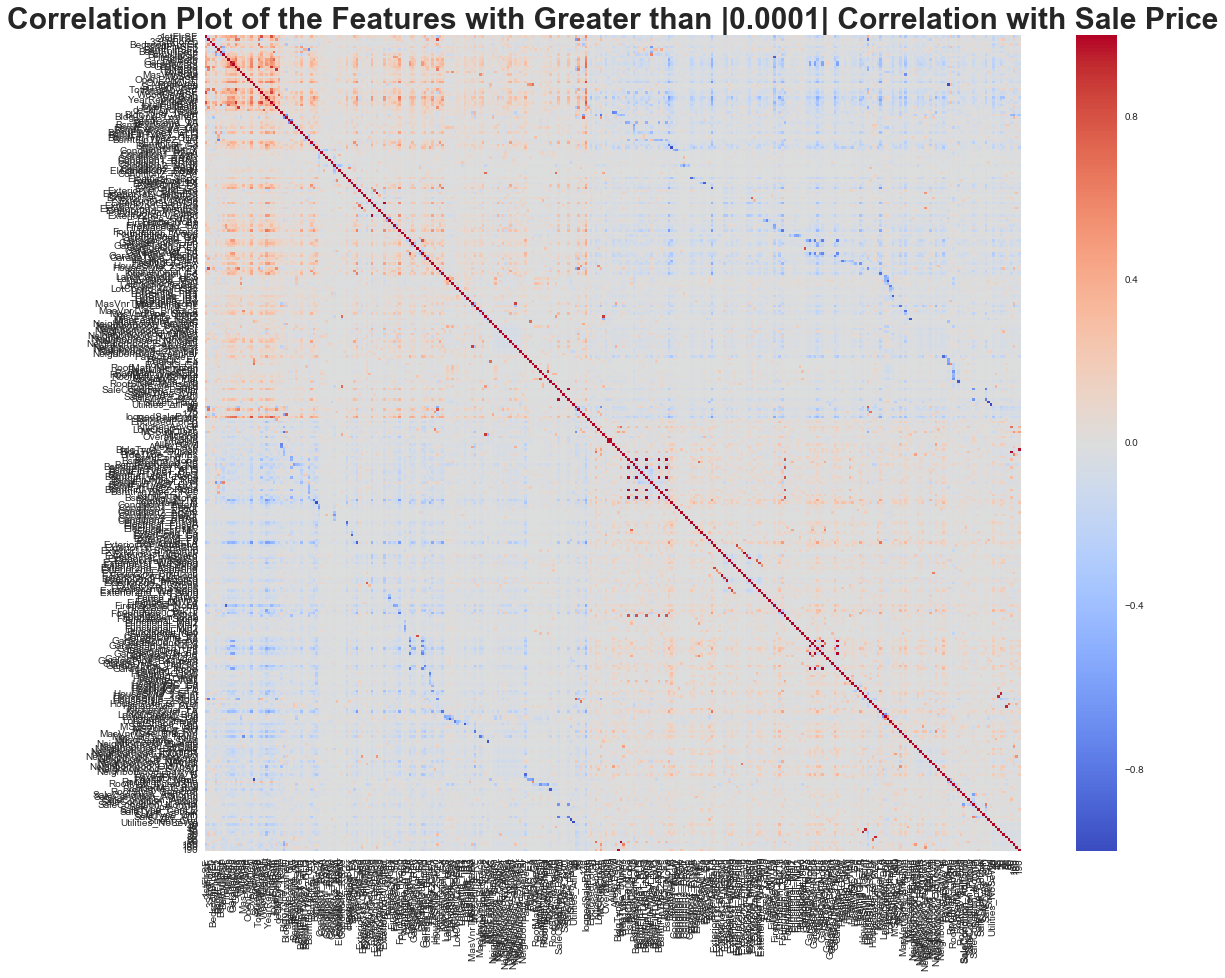

In [20]:
# Correlation matrix of numerical features
corrmat = training_cleaned[all_best_features001].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (20, 15))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax = .8, square = True, annot = False, cmap = 'coolwarm')
plt.title("Correlation Plot of the Features with Greater than |0.0001| Correlation with Sale Price", size = 30, fontweight = "bold")
plt.show()


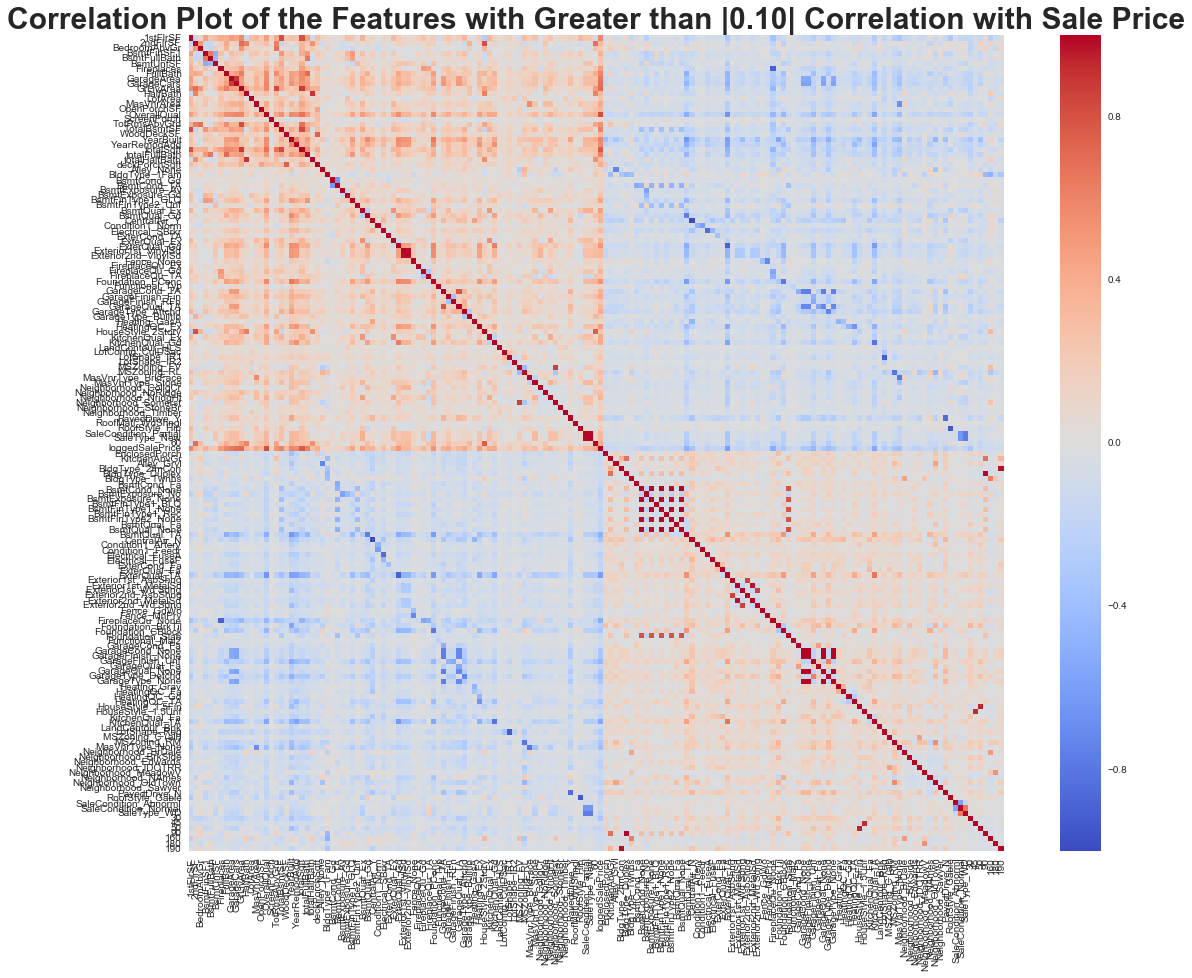

In [21]:
# Correlation matrix of numerical features
corrmat2 = training_cleaned[all_best_features].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (20, 15))

# Draw the heatmap using seaborn
sns.heatmap(corrmat2, vmax = .8, square = True, annot = False, cmap = 'coolwarm')
plt.title("Correlation Plot of the Features with Greater than |0.10| Correlation with Sale Price", size = 30, fontweight = 'bold')
plt.show()


### Find the optimal degree of correlation for inclusion in Linear Models

In [22]:
interval = 0.01
corr_range = np.arange(0,.8,interval)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


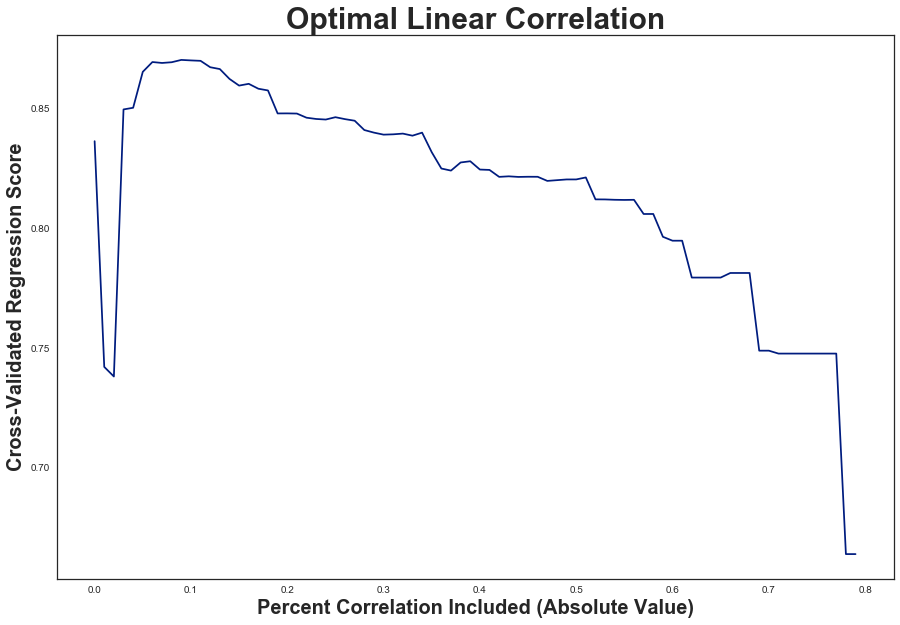

The optimal variables for inclusion in the Linear Model is those with correlation of corr = |0.09| and greater.


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score

regr = linear_model.LinearRegression()

# search for an optimal correlation value for Linear Models
corr_scores = []
for corrVal in corr_range: 

    best_features = corrmat[corrmat["loggedSalePrice"] >= corrVal]
    best_features = list(best_features.index)
    best_neg_features = corrmat[corrmat["loggedSalePrice"] <= -corrVal]
    best_neg_features = list(best_neg_features.index)
    current_best_features = best_features + best_neg_features
    current_best_features.remove("loggedSalePrice")
    current_training_cleaned = training_cleaned.drop("loggedSalePrice", axis=1)
    current_training_cleaned.head()
    Y = logged_label
    X = current_training_cleaned[current_best_features]
    
    regr_score = cross_val_score(regr, X, Y, cv=10)
    corr_scores.append(regr_score.mean())

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.figure(figsize=(15,10))
plt.plot(corr_range, corr_scores)
plt.xlabel("Percent Correlation Included (Absolute Value)", size = 20, fontweight = "bold")
plt.ylabel("Cross-Validated Regression Score", size = 20, fontweight = "bold")
plt.legend()
plt.title("Optimal Linear Correlation", size = 30, fontweight = "bold")
plt.show()

print("The optimal variables for inclusion in the Linear Model is those with correlation of " 
      "corr = |{}| and greater.".format(corr_scores.index(max(corr_scores))*interval))
max_linear = corr_scores.index(max(corr_scores))*interval

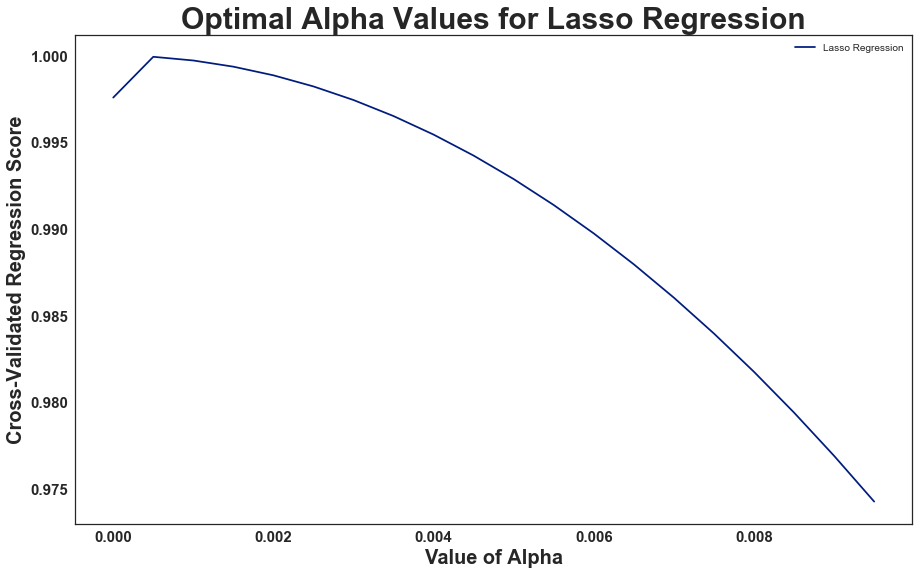

The optimal value for alpha in Lasso Regression is 0.0005. 


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

interval = 0.0005
alpha_range = np.arange(0,0.01,interval)
   
Y = logged_label
X = training_cleaned[all_best_features001]

# search for an optimal correlation value for Linear Models
lasso_scores = []
for alphaVal in alpha_range: 
    lassBig = linear_model.Lasso(alpha=alphaVal)
    lasso_score = cross_val_score(lassBig, X, Y, cv=10)
    lasso_scores.append(lasso_score.mean())
    
# plot the performance of Lasso and Ridge Regression against the value of alpha
plt.figure(figsize=(15,9))
plt.plot(alpha_range, lasso_scores, label = "Lasso Regression")
plt.xlabel("Value of Alpha", size = 20, fontweight = "bold")
plt.ylabel("Cross-Validated Regression Score", size = 20, fontweight = "bold")
plt.xticks(size = 15, fontweight = "bold")
plt.yticks(size = 15, fontweight = "bold")
plt.legend()
plt.title("Optimal Alpha Values for Lasso Regression", size = 30, fontweight = "bold")
plt.show()

print("The optimal value for alpha in Lasso Regression is {}. ".format(lasso_scores.index(max(lasso_scores))*interval))
best_alpha = lasso_scores.index(max(lasso_scores))*interval


In [25]:
# Determined by running a deep and intensive search using the following parameters: 
# interval = 0.00001
# alpha_range = np.arange(0,0.005,interval)
# best_alpha = lasso_scores.index(max(lasso_scores))*interval
# Takes ~30 mins to run. 
# max(lasso_scores) = 0.87837143492500525

best_alpha_for_Lasso = 0.0006000


During the modelling phase, we can't include the "SalePrice" feature in our model except as the target variable. 


In [26]:
all_best_features001.remove("loggedSalePrice")
all_best_features.remove("loggedSalePrice")
del training_cleaned["loggedSalePrice"]


# Generating Predictive Models

## Linear Regression

In [27]:
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score

# Takes the best value from the previous optimization exercise on the correlation value, and 
# applies it to this model. 
linear_best_features = list((corrmat[corrmat["loggedSalePrice"] >= max_linear]).index) + list(
    (corrmat[corrmat["loggedSalePrice"] <= -max_linear]).index)
linear_best_features.remove("loggedSalePrice")

regr = linear_model.LinearRegression()
Y = logged_label
X = training_cleaned[linear_best_features]
regr.fit(X, Y)

# Inspect the results.
#print('\nCoefficients: \n', regr.coef_)
#print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


R-squared:
0.913812882494


In [28]:
from sklearn.model_selection import cross_val_score

Y = logged_label
X = training_cleaned[linear_best_features]

regr_score = cross_val_score(regr, X, Y, cv=10)
print("Cross-Validated R-Squared of Linear Regression Model: %0.2f (+/- %0.2f)" 
      % (regr_score.mean(), regr_score.std() * 2))

Cross-Validated R-Squared of Linear Regression Model: 0.87 (+/- 0.12)


## LASSO Regression

In [29]:
from sklearn import linear_model
Y = logged_label
X = training_cleaned[all_best_features001]

lassolm = linear_model.Lasso(alpha=best_alpha_for_Lasso, max_iter=10000)
lassolm_score = cross_val_score(lassolm, X, Y, cv=10)
print("Cross-Validated R-Squared of Linear Regression Model: %0.2f (+/- %0.2f)" 
      % (lassolm_score.mean(), lassolm_score.std() * 2))

Cross-Validated R-Squared of Linear Regression Model: 0.88 (+/- 0.18)


## K-Nearest Neighbors

### Find an optimal k-value by iterating over each value of k

In [30]:
Y = logged_label
X = stats.zscore(training_cleaned[all_best_features])

# search for an optimal unweighted value of K for KNN
k_range = range(1,20)
k_scores = []
for k in k_range: 
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv = 10)
    k_scores.append(scores.mean())

# search for an optimal weighted value of K for KNN
k_range = range(1,20)
k_scores_w = []
for k in k_range: 
    knn_w = neighbors.KNeighborsRegressor(n_neighbors = k, weights = 'distance')
    scores_w = cross_val_score(knn_w, X, Y, cv = 10)
    k_scores_w.append(scores_w.mean())


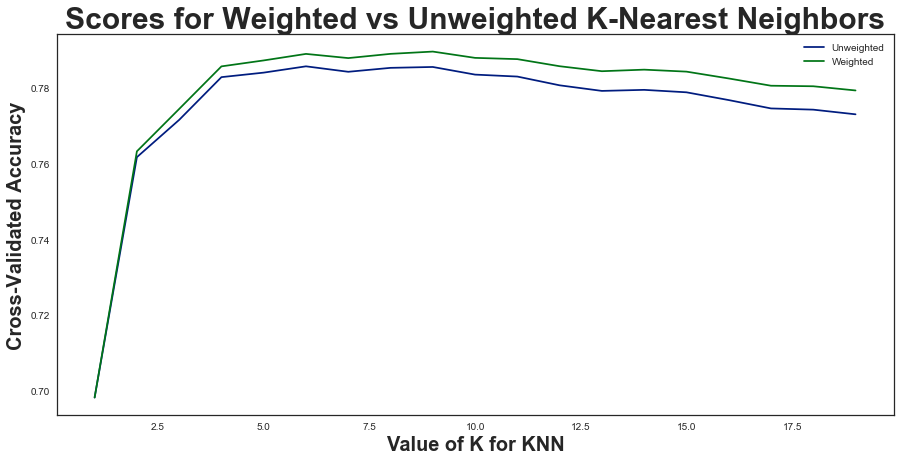

The optimal value for k (unweighted) is k=6
The optimal value for k (weighted by distance) is k=6


In [31]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.figure(figsize=(15,7))
plt.plot(k_range, k_scores, label="Unweighted")
plt.plot(k_range, k_scores_w, label="Weighted")
plt.xlabel("Value of K for KNN", size = 20, fontweight = "bold")
plt.ylabel("Cross-Validated Accuracy", size = 20, fontweight = "bold")
plt.legend()
plt.title("Scores for Weighted vs Unweighted K-Nearest Neighbors", size = 30, fontweight = "bold")
plt.show()

print("The optimal value for k (unweighted) is k={}".format(k_scores.index(max(k_scores))+1))
print("The optimal value for k (weighted by distance) is k={}".format(k_scores.index(max(k_scores))+1))

In [32]:
# Unweighted KNN (Cross-Validated)
knn = neighbors.KNeighborsRegressor(n_neighbors = 8)
knn_score = cross_val_score(knn, X, Y, cv = 10)
print("KNN Unweighted Mean Score: %0.2f (+/- %0.2f)" % (knn_score.mean(), knn_score.std() * 2))

# Weighted KNN (Cross-Validated)
knn_w = neighbors.KNeighborsRegressor(n_neighbors = 8, weights = 'distance')
knn_w_score = cross_val_score(knn_w, X, Y, cv = 10)
print("KNN Weighted Mean Score: %0.2f (+/- %0.2f)" % (knn_w_score.mean(), knn_w_score.std() * 2))

KNN Unweighted Mean Score: 0.79 (+/- 0.06)
KNN Weighted Mean Score: 0.79 (+/- 0.05)


## Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 500)
X = pd.DataFrame(training_cleaned[all_best_features])
Y = logged_label

rfr_score = cross_val_score(rfr, X, Y, cv = 10)
print("Random Forest: %0.2f (+/- %0.2f)" % (rfr_score.mean(), rfr_score.std() * 2))



Random Forest: 0.87 (+/- 0.04)


In [34]:
rfr.fit(X,Y)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [35]:
best_predictors = pd.DataFrame(rfr.feature_importances_, X.columns)
best_predictors.columns = {'score'}

sortedFeatures = best_predictors.sort_values('score', ascending="False")
list(sortedFeatures)
sortedFeaturesBest = sortedFeatures[::-1]
sortedFeaturesBest = sortedFeaturesBest[:15]
#sortedFeaturesBest

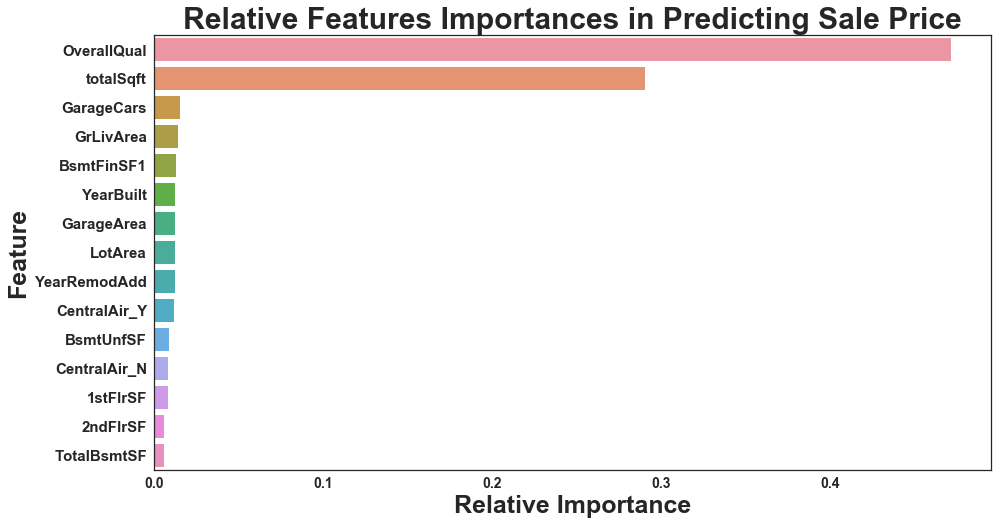

In [36]:
sns.set_style("white")
plt.figure(figsize=(15,8))
sns.barplot(x = sortedFeaturesBest.score, y=sortedFeaturesBest.index)
plt.xlabel("Relative Importance", size = 25, fontweight = "bold")
plt.ylabel("Feature", size = 25, fontweight = "bold")
plt.title("Relative Features Importances in Predicting Sale Price", size = 30, fontweight = "bold")
plt.xticks(rotation = 0, size = 14, fontweight = "bold")
plt.yticks(size = 15, fontweight = "bold")
plt.show()

## Decision Tree with AdaBoost 

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

X = pd.DataFrame(training_cleaned[all_best_features001])
Y = logged_label

# Fit regression model
ada_regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 5),
                          n_estimators = 600)

ada_regr_score = cross_val_score(ada_regr, X, Y, cv=10)
print("Decision Tree Regression With AdaBoost: %0.2f (+/- %0.2f)" % (ada_regr_score.mean(), ada_regr_score.std() * 2))


Decision Tree Regression With AdaBoost: 0.87 (+/- 0.05)


In [38]:
ada_regr.fit(X,Y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=600,
         random_state=None)

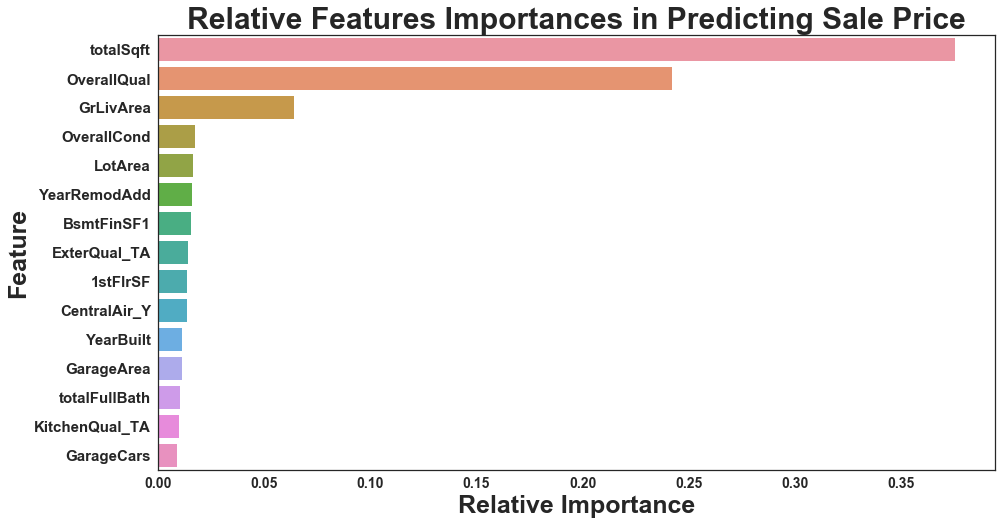

In [39]:
best_predictors = pd.DataFrame(ada_regr.feature_importances_, X.columns)
best_predictors.columns = {'score'}

sortedFeatures = best_predictors.sort_values('score', ascending="False")
list(sortedFeatures)
sortedFeaturesBest = sortedFeatures[::-1]
sortedFeaturesBest = sortedFeaturesBest[:15]
#sortedFeaturesBest

sns.set_style("white")
plt.figure(figsize=(15,8))
sns.barplot(x = sortedFeaturesBest.score, y=sortedFeaturesBest.index)
plt.xlabel("Relative Importance", size = 25, fontweight = "bold")
plt.ylabel("Feature", size = 25, fontweight = "bold")
plt.title("Relative Features Importances in Predicting Sale Price", size = 30, fontweight = "bold")
plt.xticks(rotation = 0, size = 14, fontweight = "bold")
plt.yticks(size = 15, fontweight = "bold")
plt.show()

## Gradient Boosting Regression

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X = training_cleaned[linear_best_features]
y = logged_label

gb_regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05,
    max_depth=4, loss='ls')

gb_regr_score = cross_val_score(gb_regr, X, y, cv=10)
print("Gradient Boost Regression: %0.2f (+/- %0.2f)" % (gb_regr_score.mean(), gb_regr_score.std() * 2))


Gradient Boost Regression: 0.90 (+/- 0.03)


In [41]:
gb_regr.fit(X,Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

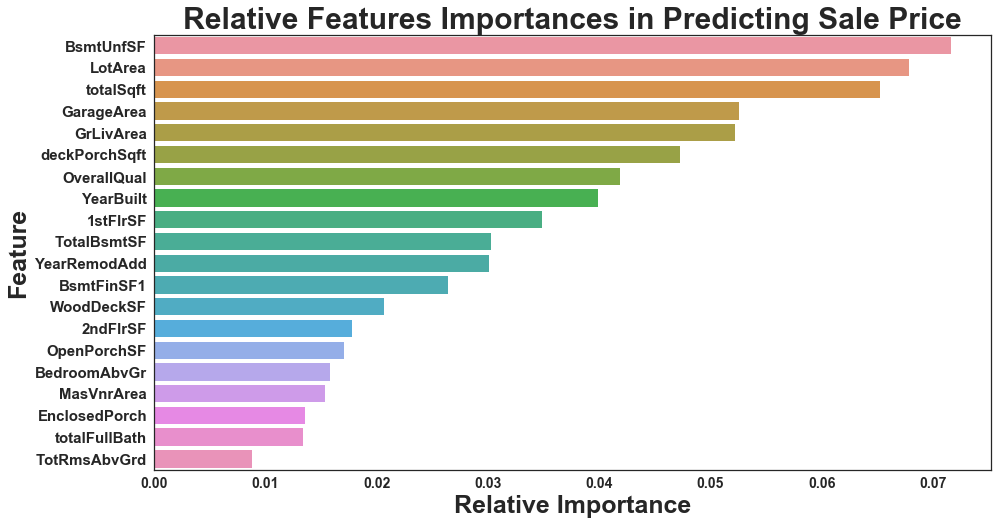

In [42]:
best_predictors = pd.DataFrame(gb_regr.feature_importances_, X.columns)
best_predictors.columns = {'score'}

sortedFeatures = best_predictors.sort_values('score', ascending="False")
list(sortedFeatures)
sortedFeaturesBest = sortedFeatures[::-1]
sortedFeaturesBest = sortedFeaturesBest[:20]
#sortedFeaturesBest

sns.set_style("white")
plt.figure(figsize=(15,8))
sns.barplot(x = sortedFeaturesBest.score, y=sortedFeaturesBest.index)
plt.xlabel("Relative Importance", size = 25, fontweight = "bold")
plt.ylabel("Feature", size = 25, fontweight = "bold")
plt.title("Relative Features Importances in Predicting Sale Price", size = 30, fontweight = "bold")
plt.xticks(rotation = 0, size = 14, fontweight = "bold")
plt.yticks(size = 15, fontweight = "bold")
plt.show()

## Model Comparision and Discussion

In [43]:
scores = pd.DataFrame()
scores["Gradient Boost"] = gb_regr_score
scores["Lasso Regression"] = lassolm_score
scores["Random Forest"] = rfr_score
scores["Linear Regression"] = regr_score
scores["AdaBoost"] = ada_regr_score
scores["Weighted KNN"] = knn_w_score
scores["KNN"] = knn_score

results = pd.DataFrame()
results["Model"] = ("Linear Regression", "K-Nearest Neighbors (KNN)", "Weighted KNN", "Random Forest", 
                    "Decision Tree with AdaBoost", "Gradient Boost", "LASSO Regression")

results["Score"] = (regr_score.mean(), knn_score.mean(), knn_w_score.mean(), rfr_score.mean(), 
                    ada_regr_score.mean(), gb_regr_score.mean(), lassolm_score.mean())
results["Standard Deviation"] = (regr_score.std(), knn_score.std(), knn_w_score.std(), rfr_score.std(), 
                                 ada_regr_score.std(), gb_regr_score.std(), lassolm_score.std())


results

,Model,Score,Standard Deviation
0,Linear Regression,0.870474,0.062324
1,K-Nearest Neighbors (KNN),0.785339,0.028535
2,Weighted KNN,0.789037,0.027473
3,Random Forest,0.874365,0.020631
4,Decision Tree with AdaBoost,0.866229,0.022547
5,Gradient Boost,0.900058,0.015261
6,LASSO Regression,0.878378,0.089917


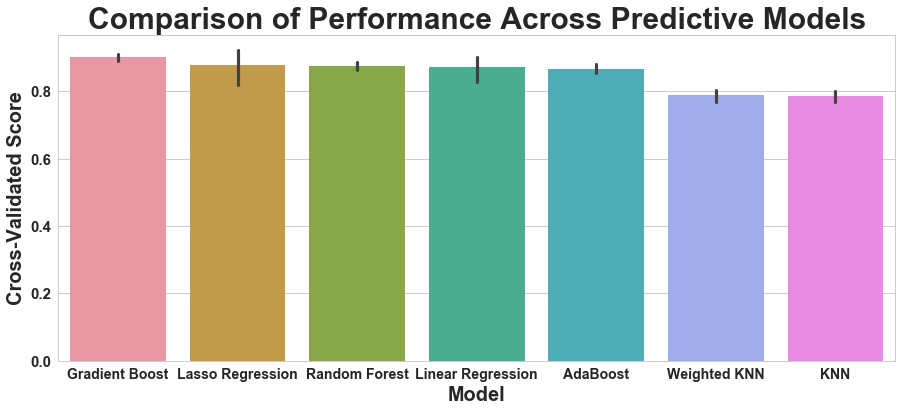

In [44]:
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
sns.barplot(data=scores)
plt.xlabel("Model", size = 20, fontweight = "bold")
plt.ylabel("Cross-Validated Score", size = 20, fontweight = "bold")
plt.title("Comparison of Performance Across Predictive Models", size = 30, fontweight = "bold")
plt.xticks(rotation = 0, size = 14, fontweight = "bold")
plt.yticks(size = 15, fontweight = "bold")
plt.show()

## Interpretation

Each strategy for modelling and predicting data has it's advantages and disadvantages. The goal is to find the method that can most accurately predict the outcome of interest, in this case the Sale Price of the home. 

The **Gradient Boost** and **AdaBoost** algorithms were among the best overall performers in this study. Their high score and low variances make them great predictive models. Disadvantages with boosting models are that they are 'black box' models, and so it can be hard to determine which variables are having the most effect on the outcome, and there may be slight variations in results between runs. Variations can be limited by running a high volume of iterations.  

The **Random Forest Regression** is an ensemble method that helps to improve the outcome from Decision Trees by reducing overfitting. Many trees are created (making a forest, if you will). Each decision tree is seeded with slightly different parameters, and each tree votes for an outcome. The Random Forest performance was high, with low variance. 

The **Linear Regression** and **Lasso Regression** models score well, however the variance is high in both cases compared to the boosting and ensemble models. This is because only one model is created, compared to boosting and ensemble models where hundreds or even thousands of models are created and combined. The best advantage to Linear and LASSO regressions is that one can obtain coefficients which are easily interpretable to decision-makers. LASSO is an especially good option for datasets with large numbers of variables.  

The **K-Nearest Neighbors Regression** models (Weighted and Unweighted) did not score as well for this dataset, however the variance between cross-validated folds is small. There may be other situations where KNN is a better performer, but it will not be included in our final prediction for this dataset. 

# Combine Best Models and Apply to the Test Set

The best performing models can now be combined to create an optimized model. Each model has certain biases, or "blind spots". We combine models built from multiple methods in order to offset biases within each model.


In [55]:
# Top Performing Models
gb_regr.fit(training_cleaned[linear_best_features],Y)
lassolm.fit(training_cleaned[all_best_features001],Y)
rfr.fit(training_cleaned[all_best_features001],Y)
regr.fit(training_cleaned[linear_best_features],Y)
ada_regr.fit(training_cleaned[all_best_features001],Y)

gb_pred = gb_regr.predict(X=test_cleaned[linear_best_features])
lasso_pred = lassolm.predict(X=test_cleaned[all_best_features001])
rfr_pred = rfr.predict(X=test_cleaned[all_best_features001])
regr_pred = regr.predict(X=test_cleaned[linear_best_features])
ada_pred = ada_regr.predict(X=test_cleaned[all_best_features001])

# Take the average of the logged predictions, then return to exponential form.
prediction = np.exp((gb_pred + lasso_pred + rfr_pred + regr_pred + ada_pred) / 5)
predictions = pd.DataFrame(prediction, index = test_cleaned["Id"], columns=["SalePrice"])

# Name output file
predictions.to_csv('/Users/jacquelynzuker/Desktop/rfr_gb_lasso_regr_ada_averaged3.csv')